<a href="https://colab.research.google.com/github/josejailson/classification/blob/main/classification_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier

mnist = fetch_openml("mnist_784", as_frame=False)

X, y = mnist.data, mnist.target

X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

y_train_5 = (y_train=='5')
y_test_5 = (y_test=='5')

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train_5)


SGDClassifier()

In [ ]:
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [ ]:
from sklearn.metrics import roc_curve

tpr, fpr, thresholds = roc_curve(y_train_5, y_scores)

In [ ]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

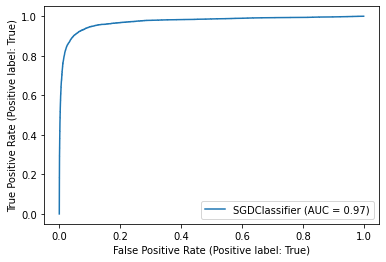

In [ ]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(sgd_clf, X_train, y_train_5)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


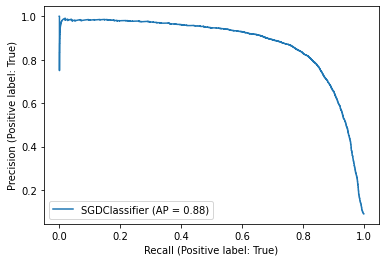

In [ ]:
from sklearn.metrics import plot_precision_recall_curve as prc

prc(sgd_clf, X_train, y_train_5)



In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.966133171455639

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score

forest_clf = RandomForestClassifier()
y_pred = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

In [ ]:
precision_score(y_train_5, y_pred)

0.9899349968546866

In [ ]:
recall_score(y_train_5, y_pred)

0.8708725327430363

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_pred)

array([[54531,    48],
       [  700,  4721]])

In [ ]:
forest_clf.fit(X_train, y_train_5)

RandomForestClassifier()

In [ ]:
forest_clf.predict([X[0]])

array([ True])